## Random Seed Data Analysis

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

## Error Correction

Last week, we saw errors occur in the graphs of multiple ML protocols. The reason why this was due to how my code interfaced with the HPC.  My code would run a python script for a given HPC job, and I would change this python script before the job was completed (i.e. change a gate from $CNOT$ to $iSWAP$ for example). Thus in the middle of the calculation the HPC would switch from using the previous python script to the updated python script, leading to erratic outputs. This is partly due to my own new experience using an HPC, as I thought as HPC would save a copy of the python script to use, and I would be able to alter it and submit different jobs. Yet, I fixed this by using a making a static python script with a Control Manager that would manage different combinations of protocols and gates effectively. Note that I checked and double checked my code and saw no other errors.

## Wendian Output Analysis

Here is an analysis of the output of Wendian's code. Here I will graph the gates CNOT, iSWAP, and SWAP with 5 different ML protocols. 

In [31]:
def genPlot(fname,df,l):
    plt.plot(df["time"],df["fidelity"],'o-')
    plt.xlabel("T/Tmin")
    plt.ylabel("Fidelity")
    plt.title(fname)
    plt.grid(which='major', linestyle='-', linewidth='0.5')
    plt.grid(which='minor', linestyle='dotted', linewidth='0.5')
    plt.minorticks_on()
    plt.legend(l)

Here is the graph of CNOT in the qubit space with a standard coupling strength.

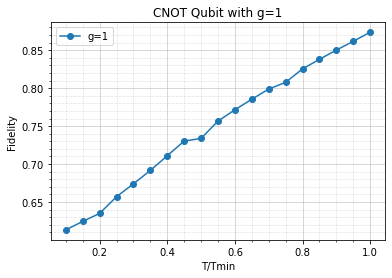

In [32]:
CNOT_QB_DF = pd.read_csv("RandomSeed_Output/CNOT/CNOT_Qubit.csv",names=["fidelity","time"])
CNOT_QB_DF.sort_values(by="time",inplace=True)
CNOT_QB_DF = CNOT_QB_DF.reset_index().drop('index',axis=1).drop(index=[0])
genPlot("CNOT Qubit with g=1",CNOT_QB_DF,["g=1"])

Here is the graph of CNOT with the coupling strength as $g=\sqrt{2}$.

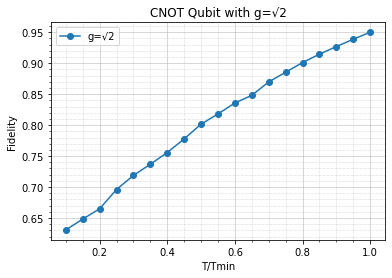

In [33]:
CNOT_QB2_DF = pd.read_csv("RandomSeed_Output/CNOT/CNOT_Qubit_gRoot2.csv",names=["fidelity","time"])
CNOT_QB2_DF.sort_values(by="time",inplace=True)
CNOT_QB2_DF = CNOT_QB2_DF.reset_index().drop('index',axis=1).drop(index=[0])
genPlot("CNOT Qubit with g=\u221A2",CNOT_QB2_DF,["g=\u221A2"])

Combinding the two, we have 

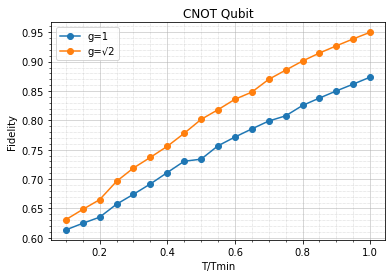

In [34]:
genPlot("CNOT Qubit with g=1",CNOT_QB_DF,["foo"])
genPlot("CNOT Qubit",CNOT_QB2_DF,["g=1","g=\u221A2"])

Checking this graph for correctness, we have

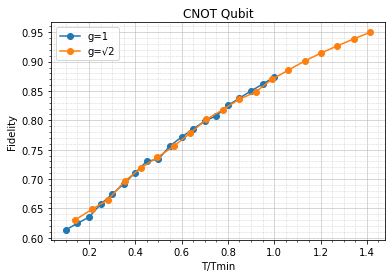

In [35]:
temp_df = CNOT_QB2_DF.copy(deep=True)
temp_df["time"] = np.sqrt(2) * temp_df["time"]
genPlot("CNOT Qubit with g=1",CNOT_QB_DF,["foo"])
genPlot("CNOT Qubit",temp_df,["g=1","g=\u221A2"])

Great now we have confidence in our code. Now looking at our more exotic protocols, we will graph the Ashabb Coupling Hamiltonian in qutrit space

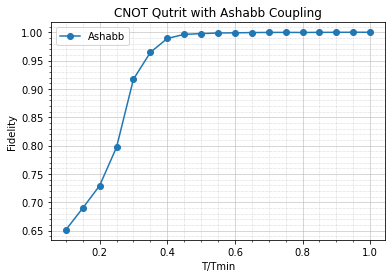

In [36]:
CNOT_A_DF = pd.read_csv("RandomSeed_Output/CNOT/CNOT_Ashabb.csv",names=["fidelity","time"])
CNOT_A_DF.sort_values(by="time",inplace=True)
CNOT_A_DF = CNOT_A_DF.reset_index().drop('index',axis=1).drop(index=[0])
genPlot("CNOT Qutrit with Ashabb Coupling",CNOT_A_DF,["Ashabb"])

Plotting this with the previous protocols, we have

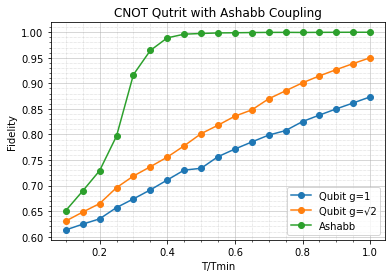

In [37]:
genPlot("CNOT Qubit with g=1",CNOT_QB_DF,["foo"])
genPlot("CNOT Qubit",CNOT_QB2_DF,["foo"])
genPlot("CNOT Qutrit with Ashabb Coupling",CNOT_A_DF,["Qubit g=1","Qubit g=\u221A2","Ashabb"])

This is the expected behavior studied for the Ashabb Hamtilonian. Now let us look at the protocol proposed by Dr. Zhexuan Gong. This protocol is similar to the bosonic protocol of swapping a particle with a speed up using a novel system with engtanglement and superpostion. Now there are two variants of this protocol, one with qubit and qutrit drives and the other with just qutrit drives. We will denote these as ZXG_sub (for just the qutrit drives) and ZXG_full (for both qubit and qutrit drives). Now looking at ZXG_sub, we have 

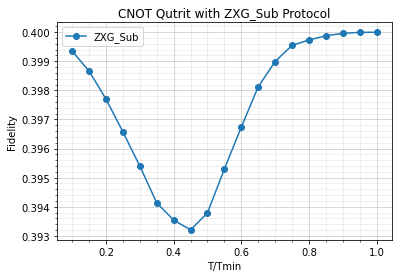

In [38]:
CNOT_ZXGSUB_DF = pd.read_csv("RandomSeed_Output/CNOT/CNOT_ZXG_Protocol_Sub.csv",names=["fidelity","time"])
CNOT_ZXGSUB_DF.sort_values(by="time",inplace=True)
CNOT_ZXGSUB_DF = CNOT_ZXGSUB_DF.reset_index().drop('index',axis=1).drop(index=[0])
genPlot("CNOT Qutrit with ZXG_Sub Protocol",CNOT_ZXGSUB_DF,["ZXG_Sub"])

Plotting this with the previous graphs, we have 

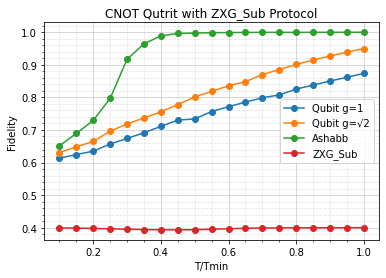

In [39]:
genPlot("CNOT Qubit with g=1",CNOT_QB_DF,["foo"])
genPlot("CNOT Qubit",CNOT_QB2_DF,["foo"])
genPlot("CNOT Qutrit with Ashabb Coupling",CNOT_A_DF,["foo"])
genPlot("CNOT Qutrit with ZXG_Sub Protocol",CNOT_ZXGSUB_DF,["Qubit g=1","Qubit g=\u221A2","Ashabb","ZXG_Sub"])

This is unforunately quite poor performance. Lets now look at the ZXG Protocl with both qubit and qutrit drives. 

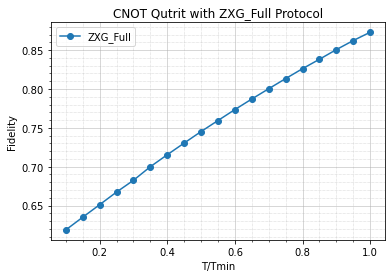

In [40]:
CNOT_ZXGFULL_DF = pd.read_csv("RandomSeed_Output/CNOT/CNOT_ZXG_Protocol_Full.csv",names=["fidelity","time"])
CNOT_ZXGFULL_DF.sort_values(by="time",inplace=True)
CNOT_ZXGFULL_DF = CNOT_ZXGFULL_DF.reset_index().drop('index',axis=1).drop(index=[0])
genPlot("CNOT Qutrit with ZXG_Full Protocol",CNOT_ZXGFULL_DF,["ZXG_Full"])

Unforunately this look like the standard $g=1$ coupling for the qubit system. Graphing everything together we have

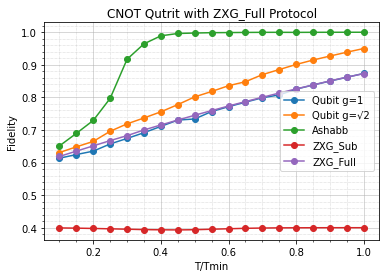

In [41]:
genPlot("CNOT Qubit with g=1",CNOT_QB_DF,["foo"])
genPlot("CNOT Qubit",CNOT_QB2_DF,["foo"])
genPlot("CNOT Qutrit with Ashabb Coupling",CNOT_A_DF,["foo"])
genPlot("CNOT Qutrit with ZXG_Sub Protocol",CNOT_ZXGSUB_DF,["foo"])
genPlot("CNOT Qutrit with ZXG_Full Protocol",CNOT_ZXGFULL_DF,["Qubit g=1","Qubit g=\u221A2","Ashabb","ZXG_Sub","ZXG_Full"])

This is unforunate results as we do not see any speed up with the new protocol. Repeating this analysis for the SWAP and iSWAP gates, we have

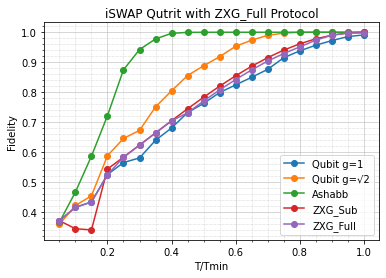

In [42]:
iSWAP_QB_DF = pd.read_csv("RandomSeed_Output/iSWAP/iSWAP_Qubit.csv",names=["fidelity","time"])
iSWAP_QB2_DF = pd.read_csv("RandomSeed_Output/iSWAP/iSWAP_Qubit_gRoot2.csv",names=["fidelity","time"])
iSWAP_A_DF = pd.read_csv("RandomSeed_Output/iSWAP/iSWAP_Ashabb.csv",names=["fidelity","time"])
iSWAP_ZXGSUB_DF = pd.read_csv("RandomSeed_Output/iSWAP/iSWAP_ZXG_Protocol_Sub.csv",names=["fidelity","time"])
iSWAP_ZXGFULL_DF = pd.read_csv("RandomSeed_Output/iSWAP/iSWAP_ZXG_Protocol_Full.csv",names=["fidelity","time"])

iSWAP_QB_DF.sort_values(by="time",inplace=True)
iSWAP_QB2_DF.sort_values(by="time",inplace=True)
iSWAP_A_DF.sort_values(by="time",inplace=True)
iSWAP_ZXGSUB_DF.sort_values(by="time",inplace=True)
iSWAP_ZXGFULL_DF.sort_values(by="time",inplace=True)

genPlot("iSWAP Qubit with g=1",iSWAP_QB_DF,["foo"])
genPlot("iSWAP Qubit",iSWAP_QB2_DF,["foo"])
genPlot("iSWAP Qutrit with Ashabb Coupling",iSWAP_A_DF,["foo"])
genPlot("iSWAP Qutrit with ZXG_Sub Protocol",iSWAP_ZXGSUB_DF,["foo"])
genPlot("iSWAP Qutrit with ZXG_Full Protocol",iSWAP_ZXGFULL_DF,["Qubit g=1","Qubit g=\u221A2","Ashabb","ZXG_Sub","ZXG_Full"])

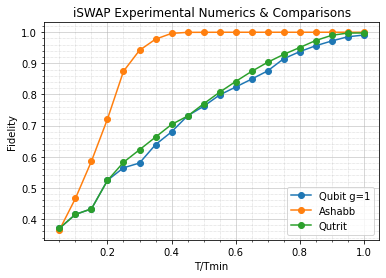

In [60]:
iSWAP_QB_DF = pd.read_csv("RandomSeed_Output/iSWAP/iSWAP_Qubit.csv",names=["fidelity","time"])
iSWAP_A_DF = pd.read_csv("RandomSeed_Output/iSWAP/iSWAP_Ashabb.csv",names=["fidelity","time"])
iSWAP_ZXGFULL_DF = pd.read_csv("RandomSeed_Output/iSWAP/iSWAP_ZXG_Protocol_Full.csv",names=["fidelity","time"])

iSWAP_QB_DF.sort_values(by="time",inplace=True)
iSWAP_A_DF.sort_values(by="time",inplace=True)
iSWAP_ZXGFULL_DF.sort_values(by="time",inplace=True)

genPlot("iSWAP Qubit with g=1",iSWAP_QB_DF,["foo"])
genPlot("iSWAP Qutrit with Ashabb Coupling",iSWAP_A_DF,["foo"])
genPlot("iSWAP Experimental Numerics & Comparisons",iSWAP_ZXGFULL_DF,["Qubit g=1","Ashabb","Qutrit"])
plt.savefig(os.path.join(os.getcwd(),"Research_Summaries/Figures/","iSWAP_Experimental.pdf"), format="pdf")

We observe similiar bevhaior for the $iSWAP$ gate compared to the $CNOT$ gate, where there is no visible speed-up from the ZXG Protocol. Note there are small non-smooth behavior, but this would likely go away if we averaged over more seeds. But doing the same analysis for $SWAP$, we see

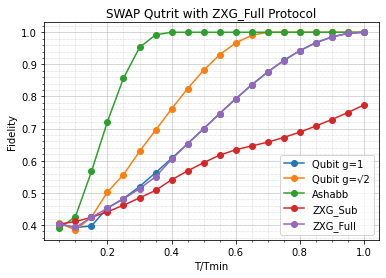

In [44]:
SWAP_QB_DF = pd.read_csv("RandomSeed_Output/SWAP/SWAP_Qubit.csv",names=["fidelity","time"])
SWAP_QB2_DF = pd.read_csv("RandomSeed_Output/SWAP/SWAP_Qubit_gRoot2.csv",names=["fidelity","time"])
SWAP_A_DF = pd.read_csv("RandomSeed_Output/SWAP/SWAP_Ashabb.csv",names=["fidelity","time"])
SWAP_ZXGSUB_DF = pd.read_csv("RandomSeed_Output/SWAP/SWAP_ZXG_Protocol_Sub.csv",names=["fidelity","time"])
SWAP_ZXGFULL_DF = pd.read_csv("RandomSeed_Output/SWAP/SWAP_ZXG_Protocol_Full.csv",names=["fidelity","time"])

SWAP_QB_DF.sort_values(by="time",inplace=True)
SWAP_QB2_DF.sort_values(by="time",inplace=True)
SWAP_A_DF.sort_values(by="time",inplace=True)
SWAP_ZXGSUB_DF.sort_values(by="time",inplace=True)
SWAP_ZXGFULL_DF.sort_values(by="time",inplace=True)

genPlot("SWAP Qubit with g=1",SWAP_QB_DF,["foo"])
genPlot("SWAP Qubit",SWAP_QB2_DF,["foo"])
genPlot("SWAP Qutrit with Ashabb Coupling",SWAP_A_DF,["foo"])
genPlot("SWAP Qutrit with ZXG_Sub Protocol",SWAP_ZXGSUB_DF,["foo"])
genPlot("SWAP Qutrit with ZXG_Full Protocol",SWAP_ZXGFULL_DF,["Qubit g=1","Qubit g=\u221A2","Ashabb","ZXG_Sub","ZXG_Full"])

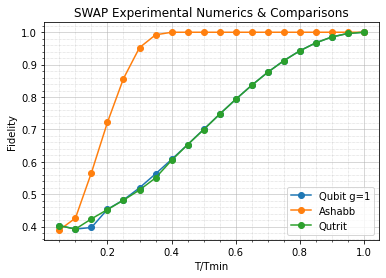

In [61]:
genPlot("SWAP Qubit with g=1",SWAP_QB_DF,["foo"])
genPlot("SWAP Qutrit with Ashabb Coupling",SWAP_A_DF,["foo"])
genPlot("SWAP Experimental Numerics & Comparisons",SWAP_ZXGFULL_DF,["Qubit g=1","Ashabb","Qutrit"])
plt.savefig(os.path.join(os.getcwd(),"Research_Summaries/Figures/","SWAP_Experimental.pdf"), format="pdf")

We see the similar speed up behavior to the other gates, as there is no signifcant speed-up. This is quite unforunate. It seems as though the Ashabb Coupling Hamiltonian is the only found coupling that leads to a significant speed up. 

## CNOT Sanity Check

Just to double check that our protocol is not being not correctly, we will test if a speed-up is achvied on the $CNOT$ gate in the qubit space with $T_{min} = \pi/2$. Usually $CNOT$ has a speed limit of half this. Thus we should see a fidelity graph of $CNOT$ saturated the speed limit in half the time. Observe the following. 

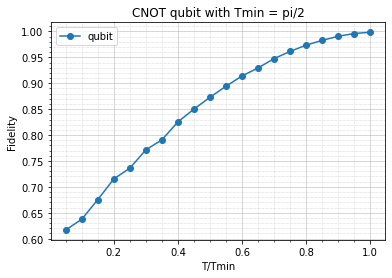

In [45]:
CNOT_SCHECK_DF = pd.read_csv("Data/CNOT_SanityC/CNOT/CNOT_Qubit.csv",names=["fidelity","time"])
CNOT_SCHECK_DF.sort_values(by="time",inplace=True)
genPlot("CNOT qubit with Tmin = pi/2",CNOT_SCHECK_DF,["qubit"])

Now lets compare this to the traditional $CNOT$ fidelity calculation with $T_{min} = \pi/4$. 

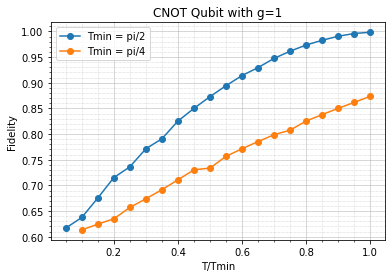

In [46]:
genPlot("CNOT qubit with Tmin = pi/2",CNOT_SCHECK_DF,["foo"])
genPlot("CNOT Qubit with g=1",CNOT_QB_DF,["Tmin = pi/2","Tmin = pi/4"])

And now if we scale the time of the $T_{min} = \pi/4$ $CNOT$ calculation by 1/2, we should see the behavior with $T_{min} = \pi/2$. This scaling indicates that the $T_min = \pi/4$ graph would only make up the first half of the $T_{min} = \pi/2$ graph.

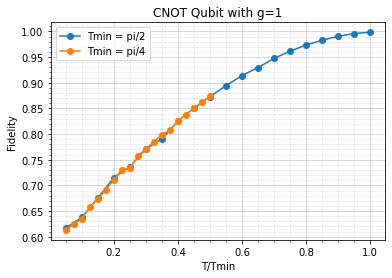

In [47]:
temp_df2 = CNOT_QB_DF.copy(deep=True)
temp_df2["time"] = 1/2*temp_df2["time"]
genPlot("CNOT qubit with Tmin = pi/2",CNOT_SCHECK_DF,["foo"])
genPlot("CNOT Qubit with g=1",temp_df2,["Tmin = pi/2","Tmin = pi/4"])

Thus we see the exact predicted behavior, and this validates our sanity check. 

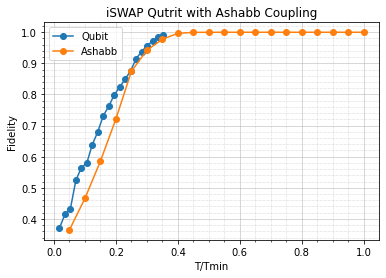

In [48]:
temp_df3 = iSWAP_QB_DF.copy(deep=True)
temp_df3["time"] = 1/(2*np.sqrt(2))*temp_df3["time"]
genPlot("iSWAP Qubit with g=1",temp_df3,["foo"])
genPlot("iSWAP Qutrit with Ashabb Coupling",iSWAP_A_DF,["Qubit","Ashabb"])

## Number operator Coupling Comparison 

Now we will see if we achieve a speed up with the coupling as the number operator for qubit and qutrit systems respectively. 

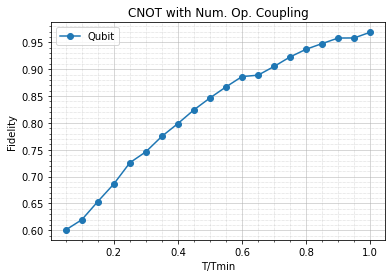

In [49]:
NQB_DF = pd.read_csv("Data/CNOT_NOP/CNOT/CNOT_Qubit_nop.csv",names=["fidelity","time"])
NQB_DF.sort_values(by="time",inplace=True)
genPlot("CNOT with Num. Op. Coupling",NQB_DF,["Qubit"])

This graph looks rather valid, as we are nearly saturating the speed limit at our specified $T_{min}$. Now lets compare it to the Qutrit case 

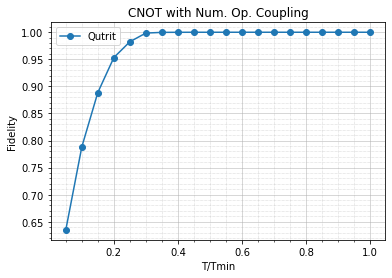

In [50]:
NQT_DF = pd.read_csv("Data/CNOT_NOP/CNOT/CNOT_Qutrit_nop.csv",names=["fidelity","time"])
NQT_DF.sort_values(by="time",inplace=True)
genPlot("CNOT with Num. Op. Coupling",NQT_DF,["Qutrit"])

Wonderful!! We do see a speed up on the Qutrit system. Comparing the two, we have 

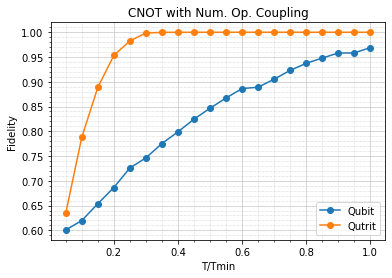

In [51]:
genPlot("CNOT with Num. Op. Coupling",NQB_DF,["Qubit"])
genPlot("CNOT with Num. Op. Coupling",NQT_DF,["Qubit","Qutrit"])

Yet this speed up may be artifical, similar to the Ashabb one. This is beacuse the coupling Hamiltonian as it has eigenvalues larger than one (with the largest being 4). Thus this may not be correct comparison to the qubit system. To make this more of an even comparison, we will do two things. First, we will just multiply our Hamiltonian by 1/4 so that the largest eigenvalue is 1. Another way is to make all non-zero values equal to one. We will show the graphs for both of these systems. 

For the coupling Hamitlonian that is scaled with a factor of $1/4$, we have 

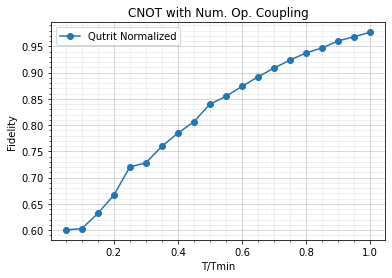

In [52]:
NNQT_DF = pd.read_csv("Data/NOP_Rerun/CNOT/CNOT_Qutrit_nop.csv",names=["fidelity","time"])
NNQT_DF.sort_values(by="time",inplace=True)
genPlot("CNOT with Num. Op. Coupling",NNQT_DF,["Qutrit Normalized"])

This graph seems much more like the qubit system. Graphing all systems together, we have 

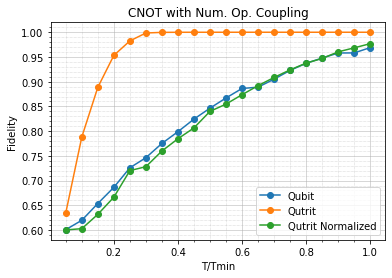

In [53]:
genPlot("CNOT with Num. Op. Coupling",NQB_DF,["Qubit"])
genPlot("CNOT with Num. Op. Coupling",NQT_DF,["Qubit","Qutrit"])
genPlot("CNOT with Num. Op. Coupling",NNQT_DF,["Qubit","Qutrit","Qutrit Normalized"])

Hence we see the expected behavior. When the Qutrit system has normalized eigenvalues, there is no speed up when compared to the qubit system. Hence the speed up seen in the above orange graph must come from the increased coupling strength rather than any novel behavior with multi-level systems. 

Yet, before we come to any conclusions, lets look at the case where all the values in the coupling Hamiltonian are 1. This is different than the above case, as when we scale our coupling Hamiltonain by $1/4$, we are only making the largest eigenvalue equal to 1. Non-maximal eigenvalues are going to be less than one, and thus this may impact the speed up of our system. A more apt comparison is when all eigenvalues have magnitude 1. While this is not the natural extension of the number operator into the qutrit system, it seems to be the most true comparison between qubit and qutrit systems. 

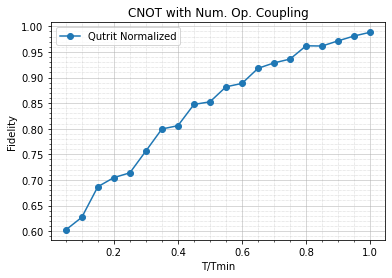

In [54]:
ONQT_DF = pd.read_csv("Data/NOP_Rerun/CNOT/CNOT_Qutrit_nop2.csv",names=["fidelity","time"])
ONQT_DF.sort_values(by="time",inplace=True)
genPlot("CNOT with Num. Op. Coupling",ONQT_DF,["Qutrit Normalized"])

This looks marignally better than the normalized coupling Hamiltonian. Graphing everything together, we have

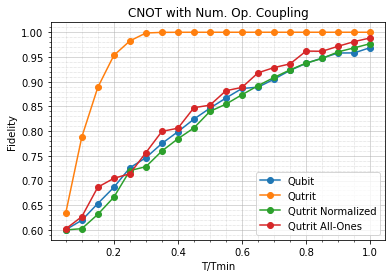

In [55]:
genPlot("CNOT with Num. Op. Coupling",NQB_DF,["Qubit"])
genPlot("CNOT with Num. Op. Coupling",NQT_DF,["Qubit","Qutrit"])
genPlot("CNOT with Num. Op. Coupling",NNQT_DF,["Qubit","Qutrit","Qutrit Normalized"])
genPlot("CNOT with Num. Op. Coupling",ONQT_DF,["Qubit","Qutrit","Qutrit Normalized","Qutrit All-Ones"])

While we do see a slight speed up compared to the qubit case, the all ones coupling Hamiltonian does not give enough of a speed up to be relavent. Thus it seems as though the number operators do not provide any speed up, but one area that may provide promise is looking at different ways to extend the number operator into the qutrit space while keeping the eigenvalues normalized. 

## Fixed Qubit Comparison to Ashabb

I have fixed the qubit comparison to the Ashabb Coupling by using the $XX$ coupling with a $T_{min} = \pi/4$. Graphing these two plots we have 